<a href="https://colab.research.google.com/github/DanaPing/Assignment/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ticket symbol?
key executive?

Find in Yahoo finance page:
URL: https://au.finance.yahoo.com/quote/CBA.AX/profile?p=CBA.AX

Company: Commonwealth
ticket symbol: CBA.AX
Key executives:(Find in profile): 


*   Mr. Matthew Comyn	CEO, MD & Exec. Director	3.55M	N/A	1976
*   Mr. Alan Docherty	Group Exec. of Financial Services & CFO	1.54M	N/A	N/A
*   Mr. Pascall Boillat	Chief Information Officer & Group Exec. of Enterprise Services	2.86M	N/A	N/A
*   Ms. Sian Lewis	Group Exec. of HR	1.29M	N/A	N/A
*   Mr. David Antony Keith Cohen B.A., L.L.B.	Deputy Chief Exec. Officer	1.85M	N/A	N/A
*   Mr. Nigel Williams	Group Chief Risk Officer	2.04M	N/A	N/A
*   Ms. Vittoria Annabel June Shortt BMS, CA	Chief Exec. & MD of ASB Bank Ltd.	1.48M	N/A	N/A
*   Mr. Mike Vacy-Lyle	Group Exec. of Bus. & Private Banking	1.69M	N/A	N/A


Get URL: could replace ticket symbol in the url

# Income tax calculation for key executives
ATO tax tables

    Taxable income  Tax on this income

    0 – $18,200         Nil

    $18,201 – $45,000   19 cents for each $1 over $18,200

    $45,001 – $120,000   $5,092 plus 32.5 cents for each $1 over $45,000

    $120,001 – $180,000  $29,467 plus 37 cents for each $1 over $120,000

    $180,001 and over    $51,667 plus 45 cents for each $1 over $180,000

Calculation:
* 0<income<18200  tax = 0
* 18200<=income<45000 tax = (income - 18200)*0.19
* 45001<=income<120000 tax = (income - 45000)*32.5 + 5092
* .....


In [1]:
#import package
!pip install kora -q
from bs4 import BeautifulSoup
from kora.selenium import wd
import pandas as pd

     |████████████████████████████████| 57 kB 4.8 MB/s 
     |████████████████████████████████| 56 kB 3.9 MB/s 


In [2]:
def get_url():
  #get ticker symbol from user
  ticker_symbol = input("What is ticker symbol？")
  #get a template of url, so ticker symbol can add in curly bracket
  template = 'https://au.finance.yahoo.com/quote/{}/profile?p={}'
  #add ticker symbol in curly bracket 
  result = template.format(ticker_symbol, ticker_symbol)
  #return the url that has ticker symbol included. 
  return result


What is ticker symbol？CBA.AX


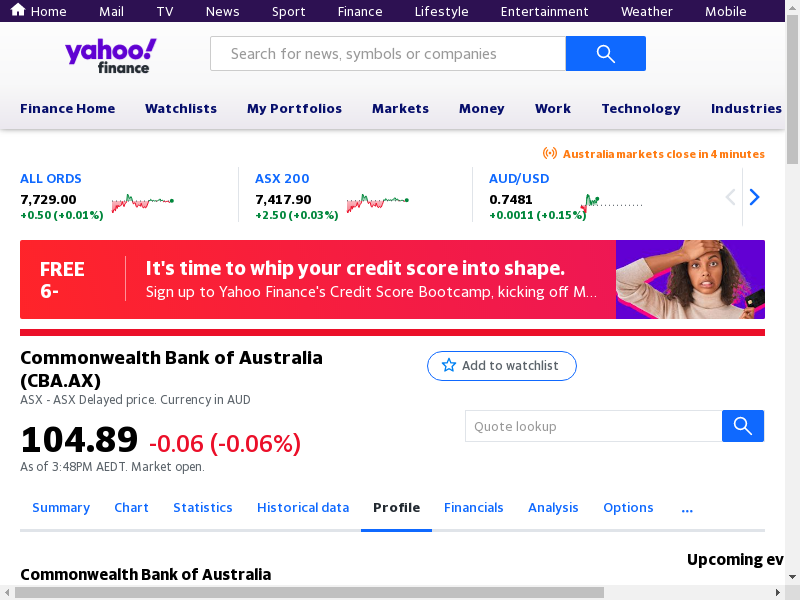

In [3]:
#check if it is right page
url = get_url()
url
wd.get(url)
wd

In [4]:
def get_cells(row):
  #td: values in the table
  cells = row.find_all('td')
  #name is the first column in the executive table 
  name = cells[0].text
  #title is the second colunm in the executive table 
  title = cells[1].text
  #salary is the third colunm in the executive table
  salary = cells[2].text
  return {'name':name, 'title': title, 'salary': salary}

In [5]:
def get_exec_record(soup):
  #locate the table and each rows of it
  table = soup.find('table')
  body = table.find('tbody')
  rows = body.find_all('tr')
#create a dictionary to store the values
  exec_records = []
  for row in rows:
    #get all cell values and store them in the dictionary
    result = get_cells(row)
    exec_records.append(result)
  return exec_records

In [6]:
#test if all values store in the dictionary
soup = BeautifulSoup(wd.page_source, "html.parser")
get_exec_record(soup)

[{'name': 'Mr. Matthew  Comyn',
  'salary': '3.55M',
  'title': 'CEO, MD & Exec. Director'},
 {'name': 'Mr. Alan  Docherty',
  'salary': '1.54M',
  'title': 'Group Exec. of Financial Services & CFO'},
 {'name': 'Mr. Pascall  Boillat',
  'salary': '2.86M',
  'title': 'Chief Information Officer & Group Exec. of Enterprise Services'},
 {'name': 'Ms. Sian  Lewis', 'salary': '1.29M', 'title': 'Group Exec. of HR'},
 {'name': 'Mr. David Antony Keith Cohen B.A., L.L.B.',
  'salary': '1.85M',
  'title': 'Deputy Chief Exec. Officer'},
 {'name': 'Mr. Nigel  Williams',
  'salary': '2.04M',
  'title': 'Group Chief Risk Officer'},
 {'name': 'Ms. Vittoria Annabel June Shortt BMS, CA',
  'salary': '1.48M',
  'title': 'Chief Exec. & MD of ASB Bank Ltd.'},
 {'name': 'Mr. Mike  Vacy-Lyle',
  'salary': '1.69M',
  'title': 'Group Exec. of Bus. & Private Banking'},
 {'name': 'Hanh  Nguyen',
  'salary': 'N/A',
  'title': 'Chief Representative and Director of Investment & Banking'},
 {'name': 'Melanie  Kirk',

In [7]:
def exec_salary(rec):
  #get value in the colunm called salary 
  salary = rec['salary']
  #locate the last character of each salary value, in this case, it is "M"
  last_char = salary[-1]
  #get all numbers
  number = salary[0:-1]
  #define last letter to numbers
  if last_char == "M":
  #if last character is M, then times number with 1000000
    salary_exec = float(number)*1000000
  elif last_char == "k":
    salary_exec = float(number)*1000
  else:
    salary_exec = 0

  return salary_exec

In [8]:
def tax_calculation(income):
  #calculate tax base on ATO table 
  if income <= 18200:
    tax_pay = 0
  elif 18201 <= income <= 45000:
    tax_pay = 0.19 * (income - 18200)
  elif 45001 <= income < 120000:
    tax_pay = 5092 + 0.32 * (income - 45000)
  elif 120001 <= income < 180000:
    tax_pay = 29467 + 0.37 * (income - 120000)
  elif income >= 180001:
    tax_pay = 51667 + 0.45 * (income - 180000)


  return tax_pay

In [9]:
#get url
url = get_url()
wd.get(url)#get yahoo finance page with ticker symbol input
soup = BeautifulSoup(wd.page_source, "html.parser")
records = get_exec_record(soup) # return all executive name, title, salary
#get executive income
for record in records: # for each executive
  result = exec_salary(record)#get all salary from records
  income_tax = tax_calculation(result)#use as input to calculate tax
  record['tax'] = income_tax# add calculated tax into 'tax' column
#use pandas dataframe represent data
exec_df = pd.DataFrame.from_records(records)#build a table with label and data, so that users can save the table in CSV file or SQL file
exec_df

What is ticker symbol？CBA.AX


,name,title,salary,tax
0,Mr. Matthew Comyn,"CEO, MD & Exec. Director",3.55M,1568167.0
1,Mr. Alan Docherty,Group Exec. of Financial Services & CFO,1.54M,663667.0
2,Mr. Pascall Boillat,Chief Information Officer & Group Exec. of Ent...,2.86M,1257667.0
3,Ms. Sian Lewis,Group Exec. of HR,1.29M,551167.0
4,"Mr. David Antony Keith Cohen B.A., L.L.B.",Deputy Chief Exec. Officer,1.85M,803167.0
5,Mr. Nigel Williams,Group Chief Risk Officer,2.04M,888667.0
6,"Ms. Vittoria Annabel June Shortt BMS, CA",Chief Exec. & MD of ASB Bank Ltd.,1.48M,636667.0
7,Mr. Mike Vacy-Lyle,Group Exec. of Bus. & Private Banking,1.69M,731167.0
8,Hanh Nguyen,Chief Representative and Director of Investmen...,N/A,0.0
9,Melanie Kirk,Head of Investor Relations,N/A,0.0


# save in SQL/ as CVS file
get input
create button

In [36]:
#get input
file_path = input('Please enter the path for csv file to be saved')
file_name = input('Please enter file name, type in ''\filename.csv'' format please')
#r converts normal string to raw string. {first}: file path, {second}: file name
template = r'{}{}'
replace = template.format(file_path, file_name)
#save as CVS file
def save_csv(button):
  templatecsv = exec_df.to_csv(replace)
  return exec_df
  #reference: https://datatofish.com/export-dataframe-to-csv/

Please enter the path for csv file to be savedC:\Users\78669\Desktop\StudyMaterial Master
Please enter file name, type in ilename.csv format please\finaltry.csv


In [37]:
import ipywidgets as widget
#create button
csv_button = widget.Button(description = "save as csv")
csv_button.layout.visibility = 'visible'
csv_button.on_click(save_csv)
csv_button

Button(description='save as csv', layout=Layout(visibility='visible'), style=ButtonStyle())

In [16]:
#save in SQL
import sqlite3
def save_sql(button):
  conn = sqlite3.connect("Executive_Tax")
  cursor = conn.cursor()
  #create a table, IF NOT EXISTS will detect if the table exists, and prevent program from crashing. 
  cursor.execute('CREATE TABLE IF NOT EXISTS executive(Name TEXT, Title TEXT, Salary NUMBER, Tax NUMBER)')
  conn.commit()
  #if_exists is to determine if the table exists, if exists, default is fail, I use replace here to drop the table and insert new values to avoid repeated values in the table
  exec_df.to_sql('executive', conn, if_exists = 'replace')
  #Executes a SQL statement, select all columns from executive table
  cursor.execute('''
  SELECT* FROM executive
  ''')
  #Fetches all rows from the result.
  for row in cursor.fetchall():
    print(row)
  #reference: https://datatofish.com/pandas-dataframe-to-sql/

In [28]:
#create button
sql_button = widget.Button(description = "save as SQL")
sql_button.layout.visibility = 'visible'
sql_button.on_click(save_sql)
sql_button

Button(description='save as SQL', layout=Layout(visibility='visible'), style=ButtonStyle())

In [35]:
#test getting input from users into brackets
templatecsv = r"{}{}"
templatecsv.format(1,2)

'12'